# STA130 TUT 11 (Nov15)<br><br> 🌳🌲 <u>Decision Tree Classification <br>with _sklearn_ and confusion matrices<u>


## ♻️ 📚 Review  / Questions [30 minutes]

### 1. **[15 of the 30 minutes]** Follow up clarification questions regarding **multiple linear regression**?  Which **classification** introduced today builds directly upon...

> 1. How are **predictors variables** used to **predict** an **outcome variable**? E.g.,
> 
>    $$Y_i = \beta_0 + \beta_1x_i + \beta_2 1_{B}(k_i) + \beta_3 1_{C}(k_i) + \beta_4x_i1_{B}(k_i) + \beta_5 1_{B}(k_i)1_{C}(k_i) + \beta_6x_i^2$$
> 
>
> 2. What's the difference between **predictive performance** and **coefficient hypothesis testing** using p-values?
> 3. Can **R-squared** ever get worse with each additional predictor variable added to the model?

Chatbot link: https://chatgpt.com/share/673679f6-6788-8003-8dda-dc3747355f7f

### 2. **[15 of the 30 minutes]** **Train-Test** "in sample" versus "out of sample" validation


In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [2]:
cancer_data = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_data.data, 
                         columns=cancer_data.feature_names)

In [3]:
# Notice the binary 'target' 
# with 'target_names': array(['malignant', 'benign'], dtype='<U9')
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,2.889816,2.339881,4.810557,6.908755,-2.133687,-1.281574,0.3001,0.14710,-1.419231,-2.541985,...,3.233961,2.852439,5.218191,7.610358,-1.818925,-0.407066,0.7119,0.2654,-0.776311,-2.129472
1,3.023834,2.877512,4.889597,7.189922,-2.468168,-2.542875,0.0869,0.07017,-1.708154,-2.870510,...,3.218476,3.153163,5.067646,7.578657,-2.089088,-1.678788,0.2416,0.1860,-1.290984,-2.418894
2,2.980111,3.056357,4.867534,7.092574,-2.210918,-1.833207,0.1974,0.12790,-1.575520,-2.813577,...,3.159975,3.239854,5.027165,7.443664,-1.935168,-0.856843,0.4504,0.2430,-1.018047,-2.435203
3,2.435366,3.014554,4.351310,5.956096,-1.948413,-1.259133,0.2414,0.10520,-1.348228,-2.328518,...,2.702032,3.277145,4.593806,6.341593,-1.561601,-0.143524,0.6869,0.2575,-0.409774,-1.754464
4,3.010128,2.663053,4.906015,7.167809,-2.299590,-2.018911,0.1980,0.10430,-1.709811,-2.833103,...,3.115292,2.813611,5.025195,7.362011,-1.984859,-1.584745,0.4000,0.1625,-1.442230,-2.566811


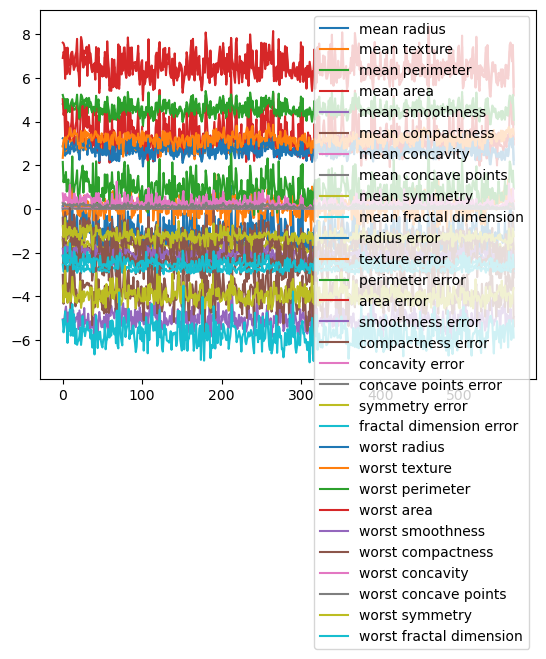

In [5]:
import matplotlib.pyplot as plt
for i in cancer_df:
    if all(cancer_df[i]>0):
        cancer_df[i]=np.log(cancer_df[i])

_ = cancer_df.plot()


# Transforms all the values into log term, only if all values on that column are positive.

In [6]:
# Randomly split into 50% training data and 50% testing data
# Why?
np.random.seed(130)
training_indices = cancer_df.sample(frac=0.5, replace=False).index.sort_values()
testing_indices = cancer_df.index[~cancer_df.index.isin(training_indices)]

In [8]:
# Recall the binary 'target' 
# But notice here the outcome variable is continuous (not binary) 
# (and same for the predictor variables, binary 'target' not used)

# Why do we need to split data into train and test?

linear_spec_4 = '''
scale(Q('mean area')) ~ scale(Q('texture error')) + scale(Q('smoothness error'))
                      + scale(Q('mean fractal dimension')) + scale(Q('mean smoothness'))
                      + scale(Q('mean symmetry')) * scale(Q('area error'))
                      * scale(Q('worst texture'))
                      * scale(Q('worst smoothness'))
                      * scale(Q('worst symmetry'))
                      * scale(Q('worst concave points'))
                      * scale(Q('worst compactness'))
                      * scale(Q('worst concavity'))
'''

# The Q() function indicates that the variables within it should be treated as quantitative variables.
# In the formula, the scale() function is applied to these variables to standardize them by subtracting the mean and 
# dividing by the standard deviation. 

linear_spec_3 = '''
scale(Q('mean area')) ~ scale(Q('texture error')) * scale(Q('smoothness error'))
                      * scale(Q('mean fractal dimension')) * scale(Q('mean smoothness'))
                      * scale(Q('mean symmetry')) 
'''

linear_spec_2 = '''
scale(Q('mean area')) ~ scale(Q('texture error')) + scale(Q('smoothness error'))
                      + scale(Q('mean fractal dimension')) + scale(Q('mean smoothness'))
                      + scale(Q('mean symmetry')) 
'''
linear_spec_1 = '''
scale(Q('mean area')) ~ scale(Q('texture error')) + scale(Q('smoothness error'))
'''
MLR_1 = smf.ols(linear_spec_1, data=cancer_df.loc[training_indices,:])
MLR_2 = smf.ols(linear_spec_2, data=cancer_df.loc[training_indices,:])
MLR_3 = smf.ols(linear_spec_3, data=cancer_df.loc[training_indices,:])
MLR_4 = smf.ols(linear_spec_4, data=cancer_df.loc[training_indices,:])


MLR_1_fit = MLR_1.fit() # Fit the mulitple lienar regression model (MLR)
MLR_2_fit = MLR_2.fit() # Fit the mulitple lienar regression model (MLR)
MLR_3_fit = MLR_3.fit() # Fit the mulitple lienar regression model (MLR)
MLR_4_fit = MLR_4.fit() # Fit the mulitple lienar regression model (MLR)


In [15]:
# "In sample" performance based on the "training data"
np.corrcoef(MLR_4_fit.predict(cancer_df.loc[training_indices,:]),
            cancer_df.loc[training_indices,"mean area"])[0,1]**2

# Basically calculating R^2

0.9933105602485323

In [16]:
# "Out of sample" performance based on the "testing data"
# Why?
np.corrcoef(MLR_4_fit.predict(cancer_df.loc[testing_indices,:]),
            cancer_df.loc[testing_indices,"mean area"])[0,1]**2

# Basically calculating R^2

0.04770632715971381

- `linear_spec_1`: The model fit as evaluated by R-squared the "proportion of variation explained" is better for data the model was trained on and worse for new data 
    - Why might this be expected?  What explains this?


- `linear_spec_2`: The "in sample" performance remains better compared to the "out of sample" performance, but overall performance is improved and relatively speaking the "out of sample" performance 
    - Why might both of these be expected?  What explains these?


- `linear_spec_3`: something has gone wrong
    - `linear_spec_4`: something has gone very wrong


- When "out of sample" predictive "proportion of variation explained" performance is not much worse than the "in sample" performance, then this suggests that the model seems to represent the data fairly well...
    - Why?




##### From ChatGPT:

**Prompt: What's a generally good value for R^2**

The value of \( R^2 \) (R-squared) represents the proportion of variance in the dependent variable that is explained by the independent variables in a regression model. A "good" \( R^2 \) value depends on the context of the problem, but here's a general guideline:

1. **Higher \( R^2 \) values** indicate a better fit, meaning the model explains more of the variance in the data. However, a very high \( R^2 \) (close to 1) doesn't always mean a good model, as it could indicate overfitting, especially with a complex model and many features.

2. **Typical ranges for \( R^2 \)**:
   - **0.8 to 1.0**: Generally considered excellent in most fields, indicating that the model explains 80% or more of the variance.
   - **0.6 to 0.8**: Good, especially for fields like economics or social sciences, where variability is often higher.
   - **0.4 to 0.6**: Fair to moderate, meaning the model explains 40% to 60% of the variance. This may be acceptable in some contexts, but it suggests that other factors may need to be considered.
   - **Below 0.4**: Often considered poor, but still useful in certain situations, particularly in highly variable or complex domains.

3. **Domain-specific variation**: 
   - In some fields, such as social sciences or economics, an \( R^2 \) of 0.3 to 0.5 might be considered acceptable because human behavior or economic conditions are inherently noisy and difficult to predict precisely.
   - In fields like physics or engineering, where more deterministic relationships are expected, an \( R^2 \) closer to 1 is typically desired.

Ultimately, the "goodness" of \( R^2 \) depends on how well the model serves its purpose in the specific domain and how accurately it predicts new data. Additionally, you should always consider other evaluation metrics like Mean Squared Error (MSE) or residual analysis alongside \( R^2 \) to get a fuller picture of model performance.

## 🚧 🏗️ Demo (Introducing Classification Decision Trees and Confusion Matrices) [30 minutes] 

### 1. **[12 of the 30 minutes]** The concept of a *classification decision tree*

Some questions to keep in mind (and hopefully answer) as you go

- What's similar about this code and the **multiple linear regression code** above? 
- A **classification decision tree** is a model like **multiple linear regression**... how so?
- **Predictions** of **classification decision tree** are made differently than those of **multiple linear regression**... how so?


In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Specify outcome and "Design Matrix"
# y ~ col1 + col2 + ... + colk
clf.fit(X=cancer_df.iloc[training_indices, :], 
        y=cancer_data.target[training_indices])
# The outcome has changed compared to the earlier multiple linear regression model...

DecisionTreeClassifier(max_depth=2, random_state=42)

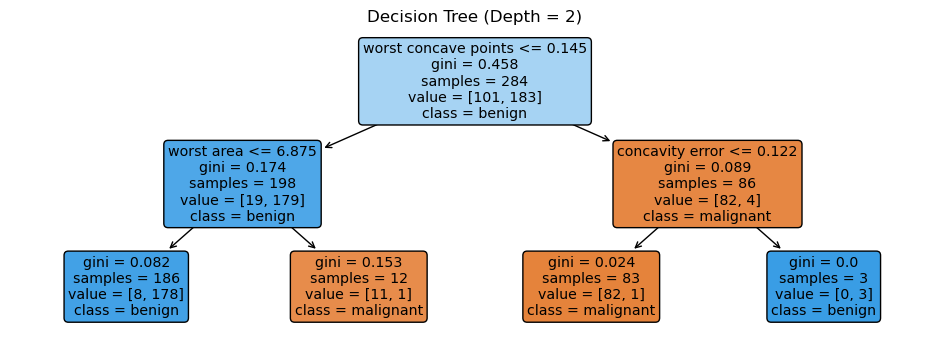

In [18]:
# Details regarding code are not the point and will be discused and explore later in LEC

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plot_tree(clf, feature_names=cancer_data.feature_names.tolist(), 
          class_names=cancer_data.target_names.tolist(), 
          filled=True, rounded=True)
plt.title("Decision Tree (Depth = 2)")
plt.show()

###  2. **[18 of the 30 minutes]** The **concept** of confusion matrix... 

> Details regarding code are not the point and will be discused and explore later in LEC

Some questions to keep in mind (and hopefully answer) as you go

- **Classification** and **regression** are distinguised by the nature of the **outcome variables** they predict... How so? 
- What should be similar about **model performance evaluation** for **classification decision tree** to what we've seen previously?
- Are multiple kinds of **model performance evaluation metrics** possible for **classification decision tree** based on the **confusion matrix**?


In [31]:
# Make Benign 0 and Malignant 1
# JUST RUN THIS ONCE!!
cancer_data.target = 1-cancer_data.target 
cancer_data.target_names = np.array(['Benign\n(negative)','Malignant\n(positive)'])

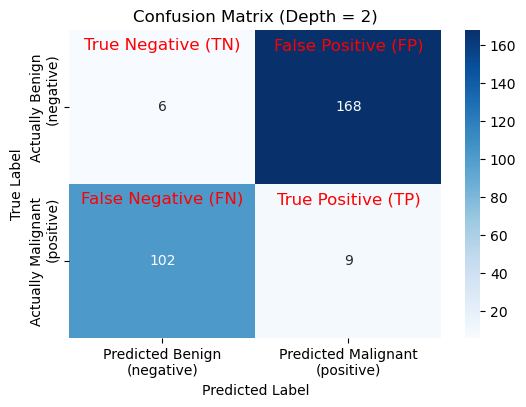

In [32]:
# Details regarding code are not the point and will be discused and explored later in LEC

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred_depth_2 = clf.predict(cancer_df.iloc[testing_indices, :])

# Generate the confusion matrix
conf_matrix = confusion_matrix(cancer_data.target[testing_indices], y_pred_depth_2)

# Get the target names for 'benign' and 'malignant'
target_names = cancer_data.target_names.tolist()

# Set up a confusion matrix with proper labels using target names
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Predicted {label}' for label in target_names], 
            yticklabels=[f'Actually {label}' for label in target_names])

plt.title('Confusion Matrix (Depth = 2)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add custom labels for FP, FN, TP, and TN
plt.text(0.5, 0.1, "True Negative (TN)", fontsize=12, color='red', ha='center', va='center')
plt.text(1.5, 0.1, "False Positive (FP)", fontsize=12, color='red', ha='center', va='center')
plt.text(0.5, 1.1, "False Negative (FN)", fontsize=12, color='red', ha='center', va='center')
plt.text(1.5, 1.1, "True Positive (TP)", fontsize=12, color='red', ha='center', va='center')

plt.show()

## 💬 🗣️ Communication Activity **[40 minutes]**

1. **[7 minutes]** Break into your **course project groups** and confer regarding the purpose of the **train-test** "in sample versus out-of-sample" **validation** framework.


2. **[6 minutes]** Identify an answer to the previous question which all groups in agreement are as close to unanimously satisfied with as possible (in the allotted time). 


3. **[7 minutes]** Have two group provide an example scenario in which the implications of **Type I errors** (wrongly rejecting the **null hypothesis**) and **Type II errors** (failing to reject a **false null hypothesis**) can be demonstrated. 


4. **[8 minutes]** Have to other groups provide an example context involving **predictions** using a **classification decision tree** in which the implications of **false positive (FP)** and **false negative (FP) predictions** can be discussed and considered.


5. **[6 minutes]** Lead a discussion with all groups exploring the analogy (and distinction) between **Type I/Type II errors** and **false positive/negative (FP/FN) predictions**. 


6. **[6 minutes]** Lead a discussion with all groups exploring what they believe the  meaningfulness, purpose, or relevance of the **train-test** "in sample versus out-of-sample" **validation** framework is relative to the **errors** considered here.


7. If time permits, explore with all the groups whether or not they have identified any notion of a difference between the natures of the consequences of **false positive** versus **false negative (FP/FN) predictions**.
